In [12]:
import os
import torch
from trainers.torch.networks import SplitValueSharedActorCritic
from mlagents_envs.base_env import ObservationSpec, DimensionProperty, ObservationType
from mlagents.trainers.settings import NetworkSettings, TrainerSettings
from mlagents_envs.base_env import ActionSpec
from trainers.policy.torch_policy import TorchPolicy
from mlagents_envs.base_env import BehaviorSpec

In [13]:
load_path = "/home/rmarr/Projects/visibility-game-env/results/dcnew2/Seeker/checkpoint.pt"
saved_state_dict = torch.load(load_path)

In [14]:
seed = 5404
observation_specs = [ObservationSpec(
            name="position_observation",
            shape=(12,),  # 3D vector
            dimension_property=(DimensionProperty.NONE,),  # Must be a tuple
            observation_type=ObservationType.DEFAULT
        )]
action_spec = ActionSpec(
    continuous_size=0,
    discrete_branches=(5,)
)
behavior_spec = BehaviorSpec(
    observation_specs=observation_specs,
    action_spec=action_spec
)
trainer_settings = TrainerSettings(
    dual_critic=True
)
network_settings = NetworkSettings(
    deterministic=False,
    memory=None,
    hidden_units=128,
    num_layers=2,
)

stream_names = ["default"]
conditional_sigma = False
tanh_squash = False
load_critic_only = "position_only"

In [15]:
policy = TorchPolicy(
    seed=seed,
    behavior_spec=behavior_spec,
    trainer_settings=trainer_settings,
    tanh_squash=False,
    separate_critic=True,
    condition_sigma_on_obs=False,
    load_critic_only='default'
)

In [16]:
modules = policy.get_modules()

In [17]:
modules['Policy'].load_state_dict(saved_state_dict['Policy'])

<All keys matched successfully>

In [18]:
positions = []
for y in range(-9, 11, 1):
    for x in range(-9, 11, 1):
        positions.append([x-0.5, 0.5, y-0.5])
positions = [torch.tensor(positions)]

In [ ]:
for pos

In [19]:
len(inputs[0])

400

In [20]:
policy.actor.critic_pass_position([torch.tensor([[8.5, 0.5, 2.5]])])[0]['extrinsic']

tensor([-2232.8245], grad_fn=<SqueezeBackward1>)

In [21]:
vals = policy.actor.critic_pass_position(inputs)[0]['extrinsic']
vals

tensor([-12586.6074, -12123.9277, -11726.8594, -11305.7793, -10809.3262,
        -10235.2285,  -9620.5674,  -9052.4023,  -8544.4512,  -8124.9502,
         -7747.1094,  -7443.1406,  -7246.0566,  -7126.5718,  -6982.5850,
         -6878.1338,  -7028.2759,  -7284.3169,  -7534.6147,  -7775.9243,
        -12277.3066, -11686.0566, -11207.0645, -10803.8506, -10344.7705,
         -9807.0176,  -9208.7129,  -8595.7031,  -8086.5806,  -7648.4629,
         -7276.7158,  -6974.9390,  -6789.8784,  -6683.5864,  -6544.2603,
         -6500.3433,  -6702.3008,  -6964.4409,  -7210.7910,  -7452.7856,
        -12118.9619, -11390.0811, -10793.8779, -10292.7793,  -9856.0098,
         -9360.6719,  -8786.5430,  -8160.5938,  -7622.1519,  -7165.0278,
         -6799.6162,  -6500.7847,  -6332.6323,  -6237.8672,  -6112.4600,
         -6147.4126,  -6383.5239,  -6644.1885,  -6886.7222,  -7153.6372,
        -12084.7031, -11256.6377, -10514.2178,  -9899.5615,  -9365.1943,
         -8889.9658,  -8356.2432,  -7747.7256,  -71

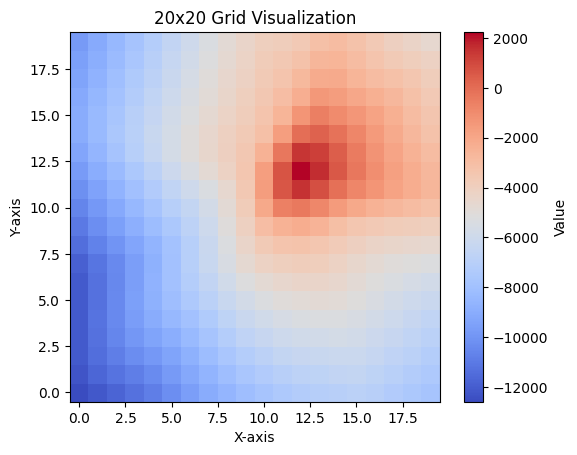

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'vals' is your tensor of 400 values
vals_np = vals.detach().cpu().numpy()  # Convert tensor to numpy array

# Reshape the values into a 20x20 grid
grid = vals_np.reshape((20, 20))

# Create a colormap with a gradient from blue (min) to red (max)
cmap = plt.get_cmap('coolwarm')

# Plot the heatmap
plt.imshow(grid, cmap=cmap, origin='lower')

# Add a color bar to show the scale
plt.colorbar(label='Value')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('20x20 Grid Visualization')

# Show the plot
plt.show()